<a href="https://colab.research.google.com/github/TillVollmer5/mass_spectroscopy/blob/main/HCA_unknowns%20screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage

drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
Auto_5_gp_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto5_PUF_120k_blank_filtered.csv')
Auto_4_gp_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto4_PUF_120k_blank_filtered.csv')
Auto_5_pm_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto5_PF_120k_blank_filtered.csv')
Auto_4_pm_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto4_PF_120k_blank_filtered.csv')

In [30]:
dfs = [Auto_4_gp_df, Auto_4_pm_df, Auto_5_pm_df, Auto_5_gp_df]

# Manually specify the names for the x-axis labels
df_names = ['Auto_4_gp_df', 'Auto_4_pm_df', 'Auto_5_pm_df', 'Auto_5_gp_df']

# Create a single dataframe with a MultiIndex
df_concat = pd.concat({name: df.groupby('Component Name')['Area Ratio'].mean() for name, df in zip(df_names, dfs)}, axis=1)

# Get the union of all unique compounds
all_compounds = set(df_concat.index)

# Reindex and fill missing values with 0
df_concat = df_concat.reindex(index=all_compounds, fill_value=0)

# Fill NaN values with 0
df_concat = df_concat.fillna(0)

# Apply Hierarchical Clustering Analysis only to columns (x-axis)
clustered_data = sns.clustermap(df_concat, cmap='viridis', annot=True, fmt=".2f", linewidths=1,
                                cbar_kws={'label': 'Area Ratio'},
                                col_cluster=True, row_cluster=False, figsize=(20, 300))
# Remove color scale
clustered_data.cax.set_visible(False)

# Remove y-axis label
clustered_data.ax_heatmap.set(ylabel='')

# Remove the plot outline above the heatmap
clustered_data.ax_row_dendrogram.set_visible(False)

plt.show()

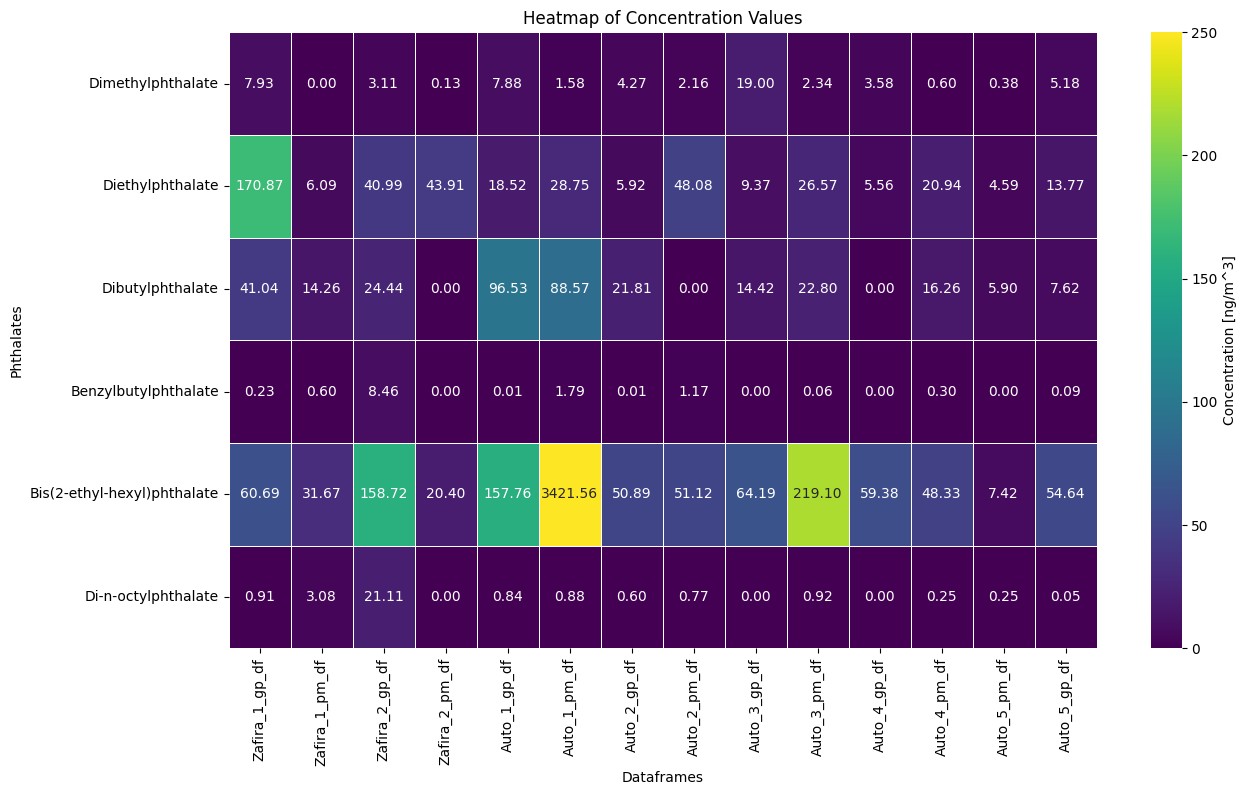

In [ ]:
dfs = [Zafira_1_gp_df, Zafira_1_pm_df, Zafira_2_gp_df, Zafira_2_pm_df,
       Auto_1_gp_df, Auto_1_pm_df, Auto_2_gp_df, Auto_2_pm_df,
       Auto_3_gp_df, Auto_3_pm_df, Auto_4_gp_df, Auto_4_pm_df,
       Auto_5_pm_df, Auto_5_gp_df]

# Manually specify the names for the x-axis labels
df_names = ['Zafira_1_gp_df', 'Zafira_1_pm_df', 'Zafira_2_gp_df', 'Zafira_2_pm_df',
            'Auto_1_gp_df', 'Auto_1_pm_df', 'Auto_2_gp_df', 'Auto_2_pm_df',
            'Auto_3_gp_df', 'Auto_3_pm_df', 'Auto_4_gp_df', 'Auto_4_pm_df',
            'Auto_5_pm_df', 'Auto_5_gp_df']

# Create a single dataframe with a MultiIndex
df_concat = pd.concat({name: df.set_index('Phthalat:')['Concentration [ng/m^3]'] for name, df in zip(df_names, dfs)}, axis=1)

# Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(df_concat, cmap='viridis', annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Concentration [ng/m^3]'}, vmax=250)
plt.title('Heatmap of Concentration Values')
plt.xlabel('Dataframes')
plt.ylabel('Phthalates')
plt.show()